In [1]:
print("Achilles Apostolou project for ML-AAU_CPH-2023")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Achilles Apostolou project for ML-AAU_CPH-2023
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [19]:
#Using the first Code Shell for Importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random


import joblib
import matplotlib.pyplot as plt

In [3]:
#Using the second Code Shell for Importing and Inspecting Datasets
df = pd.read_csv('imdb_movies.csv')
df.shape
#print(df.columns)
df.describe

<bound method NDFrame.describe of                                          names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1    

In [49]:
selected_columns = ['score', 'budget_x', 'country']
new_df = df[selected_columns]

df_cleaned = df.dropna(subset=['budget_x', 'country', 'score'])

#Cleanup of the dataset, kept only the needed columns and stored in a different .csv

new_df.to_csv('clean_imdb_movies.csv', index=False)

In [50]:
movies_data = pd.read_csv('clean_imdb_movies.csv')
movies_data.shape
movies_data.describe

<bound method NDFrame.describe of        score     budget_x country
0       73.0   75000000.0      AU
1       78.0  460000000.0      AU
2       76.0  100000000.0      AU
3       70.0   12300000.0      AU
4       61.0   77000000.0      US
...      ...          ...     ...
10173   73.0    7000000.0      US
10174   54.0    9145817.8      US
10175   61.0   21800000.0      US
10176   55.0  116000000.0      US
10177   70.0   92400000.0      GB

[10178 rows x 3 columns]>

In [51]:
#building a very simple Decision Tree Classifier model to make basic predictions.
#What we're trying to achieve is inputing a budget and predicting its score, in order to find any correlation between a film's budget and how well it is perceived by the audience.
#First, let's try with a single value input.


X = movies_data[['budget_x']]
y = movies_data['score']

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X,y)

pred = dtc_model.predict([[100000000.0]])
pred


c:\Users\apost\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([71.])

In [7]:
#Now, we will try to split the data into train and test data to get more accurate results. 
#We will also use accuracy_score from sklearn.metrics to calculate our accuracy.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)

acc_score = accuracy_score(y_test, dtc_pred)
print("The accuracy of the DTC trained model is: ", round(acc_score*100,2), "%")

#We will save this trained model using the DecisionTreeClassifier method
joblib.dump(dtc_model, 'DTC-trained.joblib')

The accuracy of the DTC trained model is:  15.11 %


['DTC-trained.joblib']

In [ ]:
#In case we want to visualize the decision tree and how it works, we can use the plot_tree function. 
#Note that because of the large data size, its good to set a max_depth so that the plotting doesnt take too much time.


dtc_model=DecisionTreeClassifier(max_depth=2)
dtc_model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dtc_model, feature_names=X.columns, filled=True, rounded=True)
plt.savefig('decision_tree.png')  # Save the plot as an image file
plt.show()

In [ ]:
#We can now try using different Algorithms in order to try and get the prediction Accuracy score up. Decision Tree Classifier is an easy-to-understand model, but our
#prediction accuracy was around 10%. Is it because there is no correlation between budget and rating, or is the model we used responsible?

In [12]:
#Let's evaluate Linear Algorithms by building a Logistic Regression model and see if the accuracy goes up.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

acc_score = accuracy_score(y_test, lr_pred)
print("The accuracy of the LR trained model is: ", round(acc_score*100,2), "%")

joblib.dump(lr_model, 'LR-trained.joblib')

The accuracy of the LR trained model is:  2.0 %


c:\Users\apost\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['LR-trained.joblib']

In [52]:
#Apparently using Logistic Regression brings the accuracy further down to 2%. Let's try scaling the data by creating a scaler.

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)

acc_score = accuracy_score(y_test, lr_pred)
print("The accuracy of the LR trained model (after scaling the data) is: ", round(acc_score*100,2), "%")


The accuracy of the LR trained model (after scaling the data) is:  5.95 %


In [82]:
#After delivery: Polynomial regression
#Check for determination instead of accuracy

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2

polymodel = pd.read_csv('clean_imdb_movies.csv')
X = movies_data[['budget_x']]
y = movies_data['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

polymodel = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polymodel.fit(X_train,y_train)

y_pred = polymodel.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

score = polymodel.score(X_test,y_test)
print("The determination is: ", round(score,2))

##

#for degree in range(10):
#    polymodel = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#    polymodel.fit(X_test,y_train)
    
#    y_pred = polymodel.predict(X_test)

#    mse = np.sqrt(mean_squared_error(y_test,y_pred))
#    print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

#    score = polymodel.score(X_test,y_test)
#    print("for degree=", degree ,"\n The determination is: ", score)

#plt.show()

Mean error: 13.0 (20.5%)
The determination is:  0.08


In [84]:
import plotly.graph_objects as go
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

The accuracy of the kNN trained model is:  10.71 %
The accuracy of the LR trained model (after scaling the data) is:  10.75 %
RMSE value for k=  1 is: 14.024506244353741
RMSE value for k=  2 is: 12.598569897039095
RMSE value for k=  3 is: 11.803629515754976
RMSE value for k=  4 is: 11.662297123605336
RMSE value for k=  5 is: 11.564809646745376
RMSE value for k=  6 is: 11.565416034889797
RMSE value for k=  7 is: 11.632596400472494
RMSE value for k=  8 is: 11.679298242725164
RMSE value for k=  9 is: 11.656822012604456
RMSE value for k=  10 is: 11.681213661416134
RMSE value for k=  11 is: 11.744565608706958
RMSE value for k=  12 is: 11.821184548920959
RMSE value for k=  13 is: 11.926619191224727
RMSE value for k=  14 is: 12.0136342484061
RMSE value for k=  15 is: 12.152691250538016
RMSE value for k=  16 is: 12.195718832914007
RMSE value for k=  17 is: 12.183052472653372
RMSE value for k=  18 is: 12.130995498991009
RMSE value for k=  19 is: 12.205162627627482
RMSE value for k=  20 is: 12.2

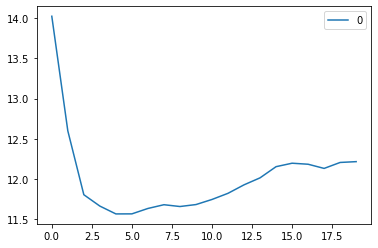

In [245]:
#Let's try doing the same using k-NN, another supervised learning model. k-NN can be used both for classification and regression problems.

knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

acc_score = accuracy_score(y_test, knn_pred)
print("The accuracy of the kNN trained model is: ", round(acc_score*100,2), "%")

knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, knn_pred)
print("The accuracy of the LR trained model (after scaling the data) is: ", round(acc_score*100,2), "%")

#~~~~~~~~~~~~~~~~~~~~~~~~~~
#we have chosen a k-value of 10, but is it ideal?
#~~~~~~~~~~~~~~~~~~~~~~~~~~

rmse_val = [] #to store the values for different k

for k in range(20):
    k=k+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,knn_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)


curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#Thus, when we have k=1 we get a high RMSE value. We get the lowest RMSE value at k=4, so this is the best one to use.

knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

acc_score = accuracy_score(y_test, knn_pred)
print("The accuracy of the kNN trained model, where k=4, is: ", round(acc_score*100,2), "%")


In [290]:
#Let's try doing the same using KMeans, an unsupervised learning algorithm, since our data sample is around 10k, to see if the data size is the one playing a role.

n_clusters=3
kmeans_model = KMeans(n_clusters= n_clusters, random_state=42)
 
kmeans_model.fit(X_train)
 
train_clusters = kmeans_model.predict(X_train)
test_clusters = kmeans_model.predict(X_test)

train_silhouette_score = silhouette_score(X_train, train_clusters)
test_silhouette_score = silhouette_score(X_test, test_clusters)

print(f"Train Silhouette Score: {train_silhouette_score}")
print(f"Test Silhouette Score: {test_silhouette_score}")

#The silhouette score of 0.63 indicates that the clusters formed by K-Means are relatively well-defined.


Train Silhouette Score: 0.6328068091513465
Test Silhouette Score: 0.6341009960346975


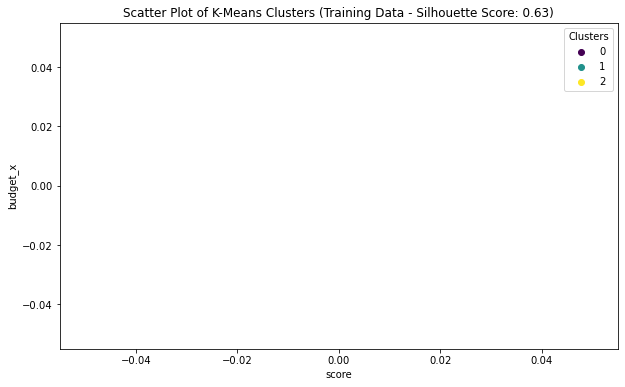

In [306]:
#K-means visualization

feature1 = 'score'
feature2 = 'budget_x'

# Visualizing clusters in the training data
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing clusters
#sns.scatterplot(x=X_train[feature1], y=X_train[feature2], hue=train_clusters, palette='viridis', s=50)
sns.scatterplot(y=X_train[feature2], hue=train_clusters, palette='viridis', s=50)


# Adding labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of K-Means Clusters (Training Data - Silhouette Score: {train_silhouette_score:.2f})')

# Display the legend
plt.legend(title='Clusters', loc='upper right')

# Show the plot
plt.show()

In [ ]:
#We have now gotten a silhouette score using clustering methods for our dataset, as well as accuracy prediction scores using supervised learning algorithms.
#Comparing the silhouette score to the accuracy score is not something that can be done, or that can give us any insight in our data's correlation.
#We have now seen that, even though the clusters are well-defined and might provide exhibit patterns within the data, we haven't managed to create a model that is able to 
#predict the rating of a movie based on its budget. This means that these two might show correlation, but not necessarily causation.

#To investigate if higher-budget films are ranked better on average in the IMDb dataset, we can perform some exploratory analysis. One approach would be to calculate
#the average IMDb score for different budget categories and visualize the relationship. 

In [262]:
bins = [0, 10000000, 50000000, 100000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for budget categories
movies_data['budget_category'] = pd.cut(movies_data['budget_x'], bins=bins, labels=labels)

average_scores_by_budget = movies_data.groupby('budget_category')['score'].mean().reset_index()
print(average_scores_by_budget)

#Interesting to see that average score is inversely proportional to the budget category

  budget_category      score
0             Low  65.323194
1          Medium  65.010268
2            High  64.686388
3       Very High  59.548272


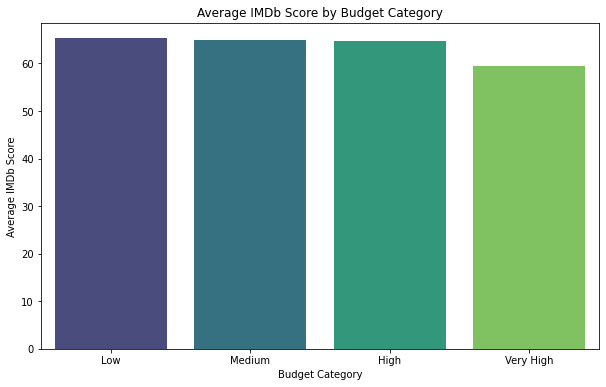

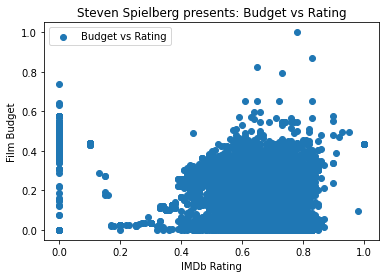

In [272]:
from sklearn.preprocessing import MinMaxScaler

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='budget_category', y='score', data=average_scores_by_budget, palette='viridis')
plt.title('Average IMDb Score by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Average IMDb Score')
plt.show()

# Creating a graph. Will need to normalize the values as the score values is much lower than the budget values.

scaler = MinMaxScaler()
normalized_columns = ['score', 'budget_x']
movies_data[normalized_columns] = scaler.fit_transform(movies_data[normalized_columns])

plt.scatter(movies_data['score'], movies_data['budget_x'], label='Budget vs Rating')

# Adding labels and title
plt.xlabel('IMDb Rating')
plt.ylabel('Film Budget')
plt.title('Steven Spielberg presents: Budget vs Rating')

plt.legend()
plt.show()

In [ ]:
#Finally, we'll use the Random Forest Classifier to predict the genre of a film based on the country of origin.

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('imdb_movies.csv')
df.shape
df = df.dropna()

X = df[['score', 'country']]
y = df['genre'].apply(lambda x: str(x).split(',')[0])
print(y)

label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

#print(classification_report(y_test, predictions))

0                  Drama
1        Science Fiction
2              Animation
3              Animation
4                 Action
              ...       
10173              Drama
10174             Action
10175              Drama
10176             Action
10177          Animation
Name: genre, Length: 10052, dtype: object


C:\Users\apost\AppData\Local\Temp\ipykernel_52848\1009012656.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = label_encoder.fit_transform(X['country'])


Accuracy: 0.23


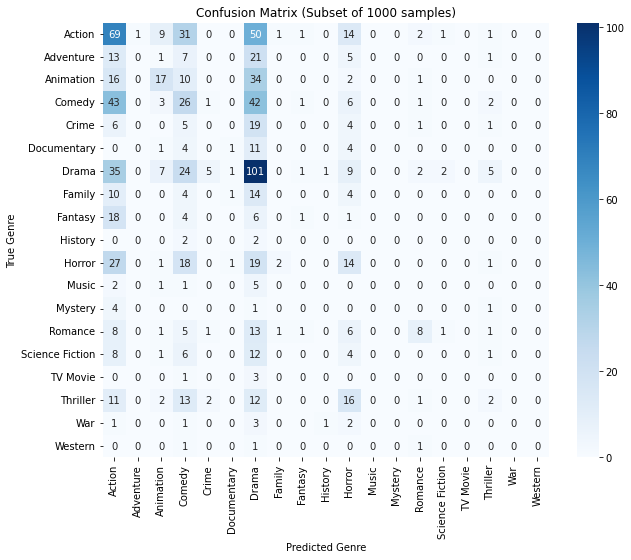

In [330]:
subset_size = 1000

# We are sampling a smaller subset to visualize as the dataset is too big
sample_indices = np.random.choice(len(y_test), size=subset_size, replace=False)
subset_y_test = y_test.iloc[sample_indices]
subset_predictions = predictions[sample_indices]


conf_matrix_subset = confusion_matrix(subset_y_test, subset_predictions)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.title(f'Confusion Matrix (Subset of {subset_size} samples)')
plt.show()

In [357]:
#confusion matrix is a table used to evaluate the performance of a classification model.
#It provides a detailed breakdown of the model's predictions and the actual outcomes for each class, in this case, in the context of a Random Forest Classifier.
#We can see that in some genres more than others, the model did a decent job in predicting the genre, given the country of origin.
#Finally, let's see what the Danish filmmakers are apparently good at:

goodfilm = random.uniform(8.5, 10)

new_data = {'score': goodfilm, 'country': 'DK'}
new_df = pd.DataFrame([new_data])
new_df['country'] = label_encoder.transform(new_df['country'])
prediction = model.predict(new_df)


print(f"The predicted genre is: {prediction[0]}")

The predicted genre is: Romance
